# 청산전략_리얼모멘텀_월별데이타 PortFolio Score + 주식채권현금 분산투자전략

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt

# Finance Library import
from Library import FinanceLibrary as fl

##### File 읽어오기

In [2]:
df_kodex = pd.read_csv("..\\Data\\KODEX200_data.csv", encoding="utf-8")
df_bond10 = pd.read_csv("..\\Data\\KOSEF국고채10년_data.csv", encoding="utf-8")
df_bond3 = pd.read_csv("..\\Data\\KOSEF국고채3년_data.csv", encoding="utf-8")

##### KODEX 주간, 월간데이터 만들기

In [3]:
df_kodex["Date"] = pd.to_datetime(df_kodex["Date"])  # Converting date to pandas datetime format
df_kodex["Year"] = df_kodex["Date"].dt.year  # Getting year number
df_kodex["Month"] = df_kodex["Date"].dt.month  # Getting month number
df_kodex["Week_Number"] = df_kodex["Date"].dt.week  # Getting week number
df_kodex["WeekDay"] = df_kodex["Date"].dt.weekday  # Getting weekday number
# 주간, 월간 Data만들기
df_kodex_week = df_kodex.groupby(["Year","Week_Number"]).agg({"Open":"first","High":"max","Low":"min","Close":"last","Volume":"sum","Date":"last"})
df_kodex_month = df_kodex.groupby(["Year","Month"]).agg({"Open":"first","High":"max","Low":"min","Close":"last","Volume":"sum","Date":"last"})

##### 국채10년 주간,월간데이터 만들기

In [4]:
df_bond10["Date"] = pd.to_datetime(df_bond10["Date"])  # Converting date to pandas datetime format
df_bond10["Year"] = df_bond10["Date"].dt.year  # Getting year number
df_bond10["Month"] = df_bond10["Date"].dt.month  # Getting month number
df_bond10["Week_Number"] = df_bond10["Date"].dt.week  # Getting week number
df_bond10["WeekDay"] = df_bond10["Date"].dt.weekday
# 주간, 월간 Data만들기
df_bond10_week = df_bond10.groupby(["Year","Week_Number"]).agg({"Open":"first","High":"max","Low":"min","Close":"last","Volume":"sum","Date":"last"})
df_bond10_month = df_bond10.groupby(["Year","Month"]).agg({"Open":"first","High":"max","Low":"min","Close":"last","Volume":"sum","Date":"last"})

##### 국채3년 주간,월간데이터 만들기

In [5]:
df_bond3["Date"] = pd.to_datetime(df_bond3["Date"])  # Converting date to pandas datetime format
df_bond3["Year"] = df_bond3["Date"].dt.year  # Getting year number
df_bond3["Month"] = df_bond3["Date"].dt.month  # Getting month number
df_bond3["Week_Number"] = df_bond3["Date"].dt.week  # Getting week number
df_bond3["WeekDay"] = df_bond3["Date"].dt.weekday
# 주간, 월간 Data만들기
df_bond3_week = df_bond3.groupby(["Year","Week_Number"]).agg({"Open":"first","High":"max","Low":"min","Close":"last","Volume":"sum","Date":"last"})
df_bond3_month = df_bond3.groupby(["Year","Month"]).agg({"Open":"first","High":"max","Low":"min","Close":"last","Volume":"sum","Date":"last"})

##### 국고채10년 데이터 시작주인 2011,42주후 데이터 만들기

In [6]:
# 국고채10년 데이터 시작주인 2011,42주후 데이터 만들기
kodex_month = df_kodex_month.loc[(2011,42):]
bond10_month = df_bond10_month.loc[(2011,42):]
bond3_month = df_bond3_month.loc[(2011,42):]
# "Date"컬럼을 index으로 지정하기
kodex_month = kodex_month.reset_index()
kodex_month.index = pd.to_datetime(kodex_month["Date"])
kodex_month = kodex_month.sort_index()
#
bond10_month = bond10_month.reset_index()
bond10_month.index = pd.to_datetime(bond10_month["Date"])
bond10_month = bond10_month.sort_index()
#
bond3_month = bond3_month.reset_index()
bond3_month.index = pd.to_datetime(bond3_month["Date"])
bond3_month = bond3_month.sort_index()

##### 샹들리에 청산 & 요요청산

In [7]:
daily = np.round(df_kodex["Close"].pct_change()*100,2)
daily.describe()

count    2273.000000
mean        0.020739
std         0.969109
min        -6.110000
25%        -0.450000
50%         0.050000
75%         0.530000
max         5.370000
Name: Close, dtype: float64

In [8]:
print ("1일 전체거래일은 {}이고, -3%이하로 하락하는 일수는 {}일이다".format(daily.count(), daily[daily<-3].count()))

1일 전체거래일은 2273이고, -3%이하로 하락하는 일수는 15일이다


In [9]:
df = fl.ChandelierYoYo(df_kodex,3,2)  # dataframe, 샹들리에청산 배수, 요요청산 배수

In [10]:
print ("요요청산 발생일은 {}일이다".format(df["YoYoExit"][df["YoYoExit"] >= 1].count()))

요요청산 발생일은 29일이다


In [11]:
print ("샹들리에청산 발생일은 {}일이다".format(df["ChandelierExit"][df["ChandelierExit"] >= 1].count()))

샹들리에청산 발생일은 661일이다


##### 현재(2019.3.24일) 샹들리에 값, 요요값을 조합하여 데이터를 만들수없어 실전에 쓰고 백테스팅은 하지 않았다

##### re-scale

In [12]:
KODEX = kodex_month["Close"]/kodex_month["Close"][0]
KODEX = pd.DataFrame(KODEX)
BOND10 = bond10_month["Close"]/bond10_month["Close"][0]
BOND10 = pd.DataFrame(BOND10)
BOND3 = bond3_month["Close"]/bond3_month["Close"][0]
BOND3 = pd.DataFrame(BOND3)

#### 주식, 국채10년, 국채3년 수익률

In [13]:
KODEX["Retrun"] = fl.YesterdayReturn(KODEX)
KODEX["Retrun"][0] = 1  # 첫번째 NaN은 "1"로 채워준다
BOND10["Retrun"] = fl.YesterdayReturn(BOND10)
BOND10["Retrun"][0] = 1  # 첫번째 NaN은 "1"로 채워준다
BOND3["Retrun"] = fl.YesterdayReturn(BOND3)
BOND3["Retrun"][0] = 1  # 첫번째 NaN은 "1"로 채워준다

##### 평균모멘텀 스코어 구하기

# Momentum? 6months

In [14]:
a = fl.AverageMomentumScore(KODEX["Close"],6)

In [15]:
# KODEX 평균모멘텀 스코어, 기간설정
KODEX["Avg Mo-Score"] = fl.AverageMomentumScore(KODEX["Close"],6)
BOND10["Avg Mo-Score"] = fl.AverageMomentumScore(BOND10["Close"],6)

### Real Momentum 사용하기

# CASH비율 조정하기

In [16]:
Cash_Score = 0.5  # 현금비율, 1(안정), 0.5(중간), 0.25(위험)

In [17]:
KODEX["Real Mo-Score"] = fl.RealMomentumScore(KODEX["Close"],BOND3["Close"],6)
BOND10["Real Mo-Score"] = fl.RealMomentumScore(BOND10["Close"],BOND3["Close"],6)

# 투자 비중 = KODEX평균모멘텀 스코어 / ( KODEX 12개월 평균 모멘텀 + BOND10 12개월 평균 모멘텀 + 현금비율)
KODEX["Ratio"] = KODEX["Real Mo-Score"]/ (KODEX["Real Mo-Score"] + BOND10["Real Mo-Score"]  + Cash_Score)
BOND10["Ratio"] = BOND10["Real Mo-Score"]/ (KODEX["Real Mo-Score"] + BOND10["Real Mo-Score"] + Cash_Score)
# 최종적으로 "1 - 사전비율"은 현금성 자산인 BOND3의 비율이 된다.
BOND3["Ratio"] = 1 - (BOND10["Ratio"] + KODEX["Ratio"])

# PortFolio Score 비율투자

In [18]:
PortFolio = pd.DataFrame()
PortFolio["PreScore"] = KODEX["Ratio"] + BOND10["Ratio"]

In [19]:
# 모멘텀비중 투자, 수익률 YesterdayReturn임으로 투자비율은 어제것을 가지고 와서 계산한다.
PortFolio["Pre수익"] = (KODEX["Retrun"] * KODEX["Ratio"].shift(1)) + (BOND10["Retrun"] * BOND10["Ratio"].shift(1))\
            + (BOND3["Retrun"] * BOND3["Ratio"].shift(1))
PortFolio["Pre수익"][0] = 1  # 첫 NaN값을 "1"로 채워준다
PortFolio["Pre누적수익"] = np.cumprod(PortFolio["Pre수익"])  # 누적 수익률 = 마켓스코어만큼 투자하고 나머지 현금으로 보유
PortFolio["Pre누적수익"][0] = 1  # 첫 NaN값을 "1"로 채워준다
# 동일비중 투자
PortFolio["균등수익"] = KODEX["Retrun"] * 1/3 + BOND10["Retrun"] * 1/3 + BOND3["Retrun"] * 1/3
PortFolio["균등누적수익"] = np.cumprod(PortFolio["균등수익"]) # 누적 수익률 = 마켓스코어만큼 투자하고 나머지 현금으로 보유

# 수익곡선 포트폴리오, 기간 6개월

In [20]:
# 모멘텀 투자
PortFolio["PortScore"] = fl.AverageMomentumScore(PortFolio["Pre누적수익"],6)
PortFolio["CashScore"] = 1 - PortFolio["PortScore"]
# 포트폴리오 수익률 그래프 스코어 계산후 적용은 어제것을 사용한다. Return만 현재이고 Ratio도 어제것을 사용한다.
PortFolio["PortReturn"] = PortFolio["PortScore"].shift(1) * (KODEX["Retrun"] * KODEX["Ratio"].shift(1) + (BOND10["Retrun"]* BOND10["Ratio"].shift(1))\
            + (BOND3["Retrun"] * BOND3["Ratio"].shift(1)))
PortFolio["PortCashReturn"] = PortFolio["CashScore"].shift(1) * BOND3["Retrun"]
PortFolio["Port최종수익"] = PortFolio["PortReturn"] + PortFolio["PortCashReturn"]
PortFolio["Port최종누적수익"] = np.cumprod(PortFolio["Port최종수익"])  # 누적 수익률 = 마켓스코어만큼 투자하고 나머지 현금으로 보유
PortFolio["Port최종누적수익"][0] = 1  # 첫 NaN값을 "1"로 채워준다

In [21]:
# csv로 저장
#PortFolio.to_csv("PortFolio.csv",sep=",",encoding="euc-kr")

##### 포트폴리오 성과 비교하기

In [22]:
kodex = fl.Portfolio(KODEX["Close"],"KODEX")
bond10 = fl.Portfolio(BOND10["Close"],"BOND10")
cash = fl.Portfolio(BOND3["Close"],"CASH")
pre = fl.Portfolio(PortFolio["Pre누적수익"],"Pre누적수익")
port = fl.Portfolio(PortFolio["Port최종누적수익"],"Port최종누적수익")
균등 = fl.Portfolio(PortFolio["균등누적수익"],"균등누적수익")

result = pd.concat([kodex,bond10,cash,pre,port,균등],axis=1)
pd.DataFrame(result).T

,Initial Balnce,Final Balance,CAGR,Std,Max.Drawdown,Sharpe Ratio
KODEX,1.0,1.217294,2.4883,0.129374,-20.1537,0.084687
BOND10,1.0,1.373705,4.0487,0.112247,-8.3105,0.323144
CASH,1.0,1.226017,2.5799,0.065223,-1.2762,0.647949
Pre누적수익,1.0,1.382010,4.1271,0.134292,-5.1241,0.290642
Port최종누적수익,1.0,1.338800,3.7145,0.118532,-3.8991,0.319094
균등누적수익,1.0,1.286388,3.1980,0.092150,-4.1461,0.254392


### 그래프

##### 자산별 DD

In [23]:
import matplotlib.pyplot as plt

DD, MDD = fl.MDD(KODEX["Close"])
DD.plot(figsize=(16,4), label="KODEX DD")
MDD.plot(label="KODEX MDD")
plt.legend()

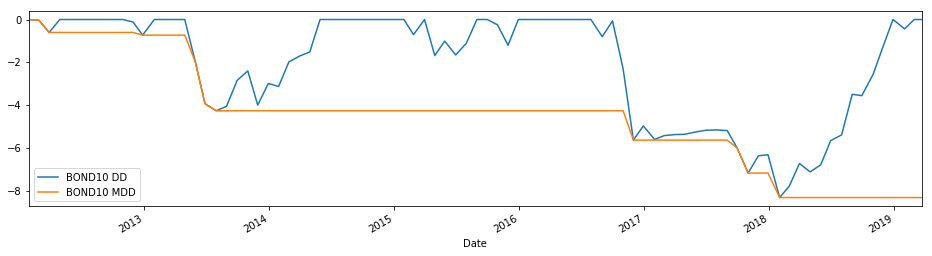

In [24]:
DD, MDD = fl.MDD(BOND10["Close"])
DD.plot(figsize=(16,4), label="BOND10 DD")
MDD.plot(label="BOND10 MDD")
plt.legend()

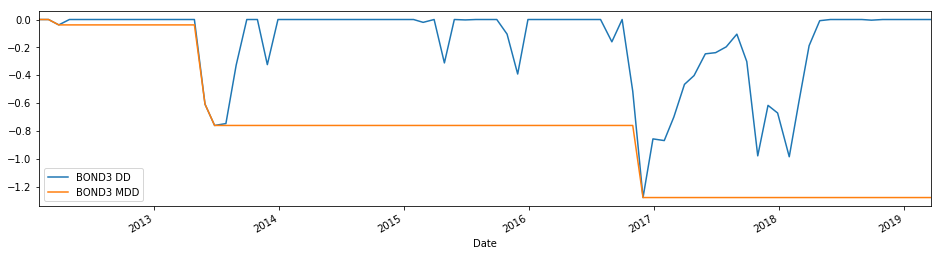

In [25]:
DD, MDD = fl.MDD(BOND3["Close"])
DD.plot(figsize=(16,4), label="BOND3 DD")
MDD.plot(label="BOND3 MDD")
plt.legend()

##### 성과

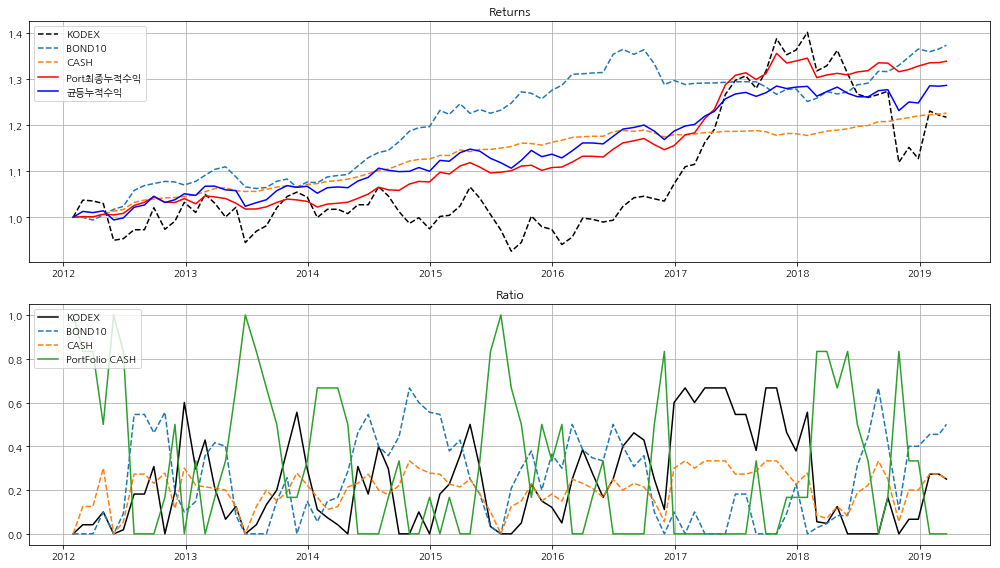

In [26]:
import matplotlib.pyplot as plt
#한글폰트사용하기
from matplotlib import rc, font_manager
import matplotlib
rc("font", family="NanumGothic")
matplotlib.rcParams['axes.unicode_minus'] = False
%matplotlib inline

fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.set_title("Returns")
ax1.plot(KODEX["Close"],color="Black",linestyle="--",label="KODEX")
ax1.plot(BOND10["Close"],linestyle="--",label="BOND10")
ax1.plot(BOND3["Close"],linestyle="--",label="CASH")
ax1.plot(PortFolio["Port최종누적수익"],color="Red",label="Port최종누적수익")
ax1.plot(PortFolio["균등누적수익"],color="Blue",label="균등누적수익")
ax1.grid()
ax1.legend(loc=2)

ax2.set_title("Ratio")
ax2.plot(PortFolio["PortScore"]*KODEX["Ratio"],color="Black", label="KODEX")
ax2.plot(PortFolio["PortScore"]*BOND10["Ratio"], linestyle="--",label="BOND10")
ax2.plot(PortFolio["PortScore"]*BOND3["Ratio"], linestyle="--",label="CASH")
ax2.plot(PortFolio["CashScore"], label="PortFolio CASH")
ax2.grid()
ax2.legend(loc=2)

# 차트끼리 충돌을 방지합니다.
plt.tight_layout()
plt.show()